## Modelado de opiniones y su impacto en la generación de consensos y disensos en una plataforma de CrowdSourcing

El objetivo de la simulación es dilucidar el funcionamiento de las dinámicas de opinión en una plataforma de CrowdSourcing donde las personas expresan sus opiniones y votan las expresadas por otros bajo una serie de condiciones especificadas por el contexto de la plataforma.

    La  plataforma de CrowdSourcing que la simulación pretende emular tiene la siguiente lógica: los sujetos ingresan de forma secuencial y seleccionan un “desafío” (identificado con una consigna particular) sobre el cual tienen que expresar su opinión sobre la temática del desafío y votar las opiniones de otros agentes sobre el mismo desafío. A la hora de votar los usuarios ven un subconjunto (de cantidad fija) del total de las opiniones, sobre las cuales pueden expresar sus votos de valencia positiva o negativa, dependiendo el desafío. El criterio de votación que se les presentará a los agentes sería:
        A. La opinión que más les gustaría que termine en el conjunto de las más votadas. 
        B. La opinión que menos les gustaría que termine en el conjunto de las más votadas. 
    
    El orden de estas acciones (votar y opinar) puede variar dependiendo el desafío, es decir, puede que las personas primero expresen su opinión, y luego voten, o viceversa. 
    Con este fin se simulan diversos escenarios posibles, donde se variarán diferentes parámetros principalmente relacionados a los agentes, los cuales serán descritos a continuación.


In [1]:
import random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pandas import Series, DataFrame
#pd.options.mode.chained_assignment = None 


TamañoDeLaMuestra = [100, 200, 500, 1000] # Cantidad de agentes que quiero en la muestra.
QOpinionesExpuestas = 5 #Cantidad de opiniones que quiero que vea cada agente
QVecesMuestroOpinion = 15 # Cantidad de veces maxima que se muestra una opinion

    La cantidad de agentes (usuarios) está dado por el parámetro N siendo ai , con i = 1, 2, ... , N, el agente i-ésimo de la simulación. A su vez cada agente tiene asociada una opinión en un espacio ideológico definido según O(ai)=Oi

    Donde Oi es un vector en una o tres dimensiones dependiendo el caso por lo que está definido como O(ai)=Oi=[Oi1], i = 1, 2, ... , N; Oi𝛜 ℝ para el caso univariado y como O(ai)=Oi=[Oi1,Oi2,Oi3], i = 1, 2, ... , N; Oi𝛜 ℝ3 para el caso multivariado, donde Oi es la opinión del agente i-ésimo en el espacio tridimensional. 
    
    Las opiniones del agente i-ésimo se obtienen por muestreo según el caso. Para el caso univariado se utilizará una distribución uniforme en el rango [-1,1] o una distribución normal con parámetros N(0,σ) cuando no existe polarización, o una mezcla de c distribuciones gaussianas con parámetros N(i1,2, ..., c ,) donde ambas poseen la misma varianza y la diferencia entre |𝜇i-𝜇j| i,j1,2, ... ,c denota el nivel de polarización. Para el caso multivariado se realiza un muestreo a partir de una distribución gaussiana multivariada cuya distribución en uno de los casos va a estar definida como N(0,), y en el otro caso va a estar dado por una mezcla de gaussianas multivariadas con c componentes representando c grupos de opiniones definidas según N(i1,2, ... , c ,) donde la diferencia entre 𝜇1 y 𝜇2 va a indicar el grado de polarización de las opiniones. Para todos los casos la estructura de la matriz de covarianza 𝝨 es esférica. 

    Es entonces O(ai) una realización de alguna de estas distribuciones multivariadas y expresa la idea que ai ingresa a la plataforma y expresa su opinión siendo t={O1,O2, ... , Ot}, tN el conjunto de todas las opiniones presentes en la plataforma hasta el momento t. 

    Dada una cantidad k (k = 5) de opiniones disponibles en la votación, sea Git el subconjunto de k opiniones vistas por el i-ésimo agente. Si se le muestran al agente ai el conjunto de opiniones Gi, con Oj  Gi,j=1,2, ... ,k opiniones, podemos definir la conducta de votación positiva de diversas maneras.

    En una primera instancia podemos definir como modelo nulo la votación que se da de manera aleatoria donde la probabilidad de que el agente aivote positivamente a la idea Oj es 1kOjGi.  En el caso determinista el agente ai vota positivamente la opinión j con la mínima distancia a la suya propia dado por Di,jdefinido como la distancia absoluta entre dos opiniones según Di,j= |Oi-Oj| , ij , i,j=1,2,...,N donde OjGi.

    Con la salvedad de que si  Di,j= Di,l mínimo para algún jl, el agente ai elige de manera aleatoria entre Oj y Ol con igual probabilidad. 

    El voto negativo sigue la misma lógica pero utiliza la máxima distancia Di,j para la elección.

    En el caso probabilístico, la probabilidad de que el agente ai vote positivamente a la idea Oj está dado por Pi(Oj)=Di,j-1jkDi,j-1,ij, i,j=1,2,...,N 

    Se define entonces la probabilidad de que el agente aivote positivamente a la idea Oj como proporcional a la inversa de la distancia entre la opinión del agente ai (Oi ) y la idea  Oj: Pi(Oj)∝1Di,j

    La conducta de votación negativa funciona de manera análoga con la única diferencia que no se toma la inversa de la distancia, es decir Pi(Oj)=Di,jkDi,j y por tanto la probabilidad es proporcional a la distancia Pi(Oj)∝Di,j donde Pi(Oj) es la probabilidad del agente i-ésimo de votar negativamente la idea j. 


# Agentes

In [35]:

#<<<<<<<<<<<<<<<<<<<<<<<<< Agente Nulo >>>>>>>>>>>>>>>>>>>>>>>>>

class AgenteNulo (object):
    def __init__ (self, tipo,ID):
        self.Oi = self.set_Oi (tipo)
        self.ID = ID # Genero un ID para cada agente
        self.IdeasVistas = [] # Me va a servir para almacenar las ideas a las que haya estado expuesto el sujeto
        self.IdeasVotadas = [] # Almaceno las ideas que voto
        self.Valencias = []
    
    def __str__ (self):
        return "Despues lo seteo"

###############################################################################################
# Tengo que configurar como generarle la opinion al sujeto

    def set_Oi (self, tipo):
        if tipo != "uniforme" and tipo != "normal":
            raise Exception("El tipo de opinion solo puede ser ""uniforme""o ""normal")
            
        if tipo == "uniforme":
            opinion = random.uniform (-1,1)
        # if tipo == "normal": 
            # opinion = ¤SETEAR LA OPINION NORMAL ###############################################################################################
        return opinion

###############################################################################################

    def append_IdeasVistas (self, IdeaVista):
        self.IdeasVistas.append (IdeaVista)

    def append_IdeasVotadas (self, IdeaVotada):
        self.IdeasVotadas.append (IdeaVotada)   

    def append_Valencias (self, Valencias):
        self.Valencias.append (Valencias) 

    def algvotar (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 3             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 0
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V < Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar 

    def algvotarneg (self, ideas): # Asume que se le da un dataframe con las opiniones (distribuidas uniformemente),
        Comp = 0             # y devuelve cual es el ID de la idea mas cercana a la del sujeto
        vota = 3
        for i in ideas.index:
            V = abs(ideas.at[i,'Opinion']-self.Oi)
            if V == Comp:
                vota = random.randint (i, vota)
            elif V > Comp:
                vota = i
                Comp = V
        return vota # Me devuelve la id de la idea a votar
    
    def ListaVotos (self, VotosPos, VotosNeg):
        votos = VotosPos * [1] + VotosNeg * [-1]
        return votos
    
    def votar (self, ideas): # Modelo de votacion aleatoria nulo
        self.IdeasVistas.append (ideas)
        Votara = ideas.sample (n = QIdeasAVotar)
        votos = self.ListaVotos(VotosPos, VotosNeg)
        vota = []
        for i in Votara.index:
            vota.append (i)
        self.IdeasVotadas.append (vota)
        self.Valencias.append (votos)
        devuelve = pd.DataFrame(votos, vota)
        return devuelve

    def comparar (self, idea): # Devuelve la distancia entre la opinion que se le pase y la del sujeto
        Distancia = abs(idea-self.Oi)
        return Distancia
    
    def get_Oi (self):
        return self.Oi
    
    def get_IdeasVistas (self):
        return self.IdeasVistas

    def get_ID (self):
        return self.ID
    
    def clean_IdeasVistas (self):
        self.IdeasVistas = []
        
        
#<<<<<<<<<<<<<<<<<<<<<<<<< Agente Determinista >>>>>>>>>>>>>>>>>>>>>>>>>

class AgenteDeterminista (AgenteNulo):
        
        def votar (self, ideas): # Aca solo elimino el tipo de votacion que va a quedar definido por la herencia de clase
            self.IdeasVistas.append (ideas)
            ideas2 = ideas.copy ()
            vota = []
            votos = self.ListaVotos(VotosPos, VotosNeg) # Esta funcion deberia tomar las variables globales que le paso a cada simulacion sobre cuantos votos quiero que tenga c/u nose si va a funcionar
            for i in votos:
                if i == 1:
                    va = self.algvotar (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
                if i == -1:
                    va = self.algvotarneg (ideas2)
                    ideas2.drop (va)
                    vota.append (va)
            self.IdeasVotadas.append (vota)
            self.Valencias.append (votos)
            devuelve = pd.DataFrame(votos, vota)
            return devuelve

    
#<<<<<<<<<<<<<<<<<<<<<<<<< Agente Probabilistico >>>>>>>>>>>>>>>>>>>>>>>>>
        
class AgenteProbabilistico (AgenteNulo):
    pass
    # FALTA ARMAR ESTO ################################################################################


        

SyntaxError: invalid syntax (<ipython-input-35-8334b3b27870>, line 1)

### Metodos se seleccion de ideas a votar

In [33]:
def metodo_de_seleccion (lista, tipo): # 'menos vistas', 'ratio', 'xxxxxx'
    
    if tipo == "menos vistas":
        lista.sort_values(by='Vistas', inplace=True)
        Devuelve = lista.iloc[:QOpinionesExpuestas, :2]
        return Devuelve
    
    if tipo == "ratio":
        lista.sort_values(by=['Votos'], ascending=False, inplace=True) # Ordeno las ideas de mayor a menor acorde a la cantidad de votos
        OpinionesMasVotadas = lista.iloc[:10, :2] # Creo un DF con las 10 Opiniones mas votadas
        OpinionesMasVotadasSeleccionadas = OpinionesMasVotadas.sample (n=5) # Selecciono 5 de las 10 opiniones mas votadas
        RestoDeOpiniones = lista.iloc[10:, :]
        RestoDeOpiniones.sort_values(by='Ratio', ascending=False, inplace=True)
        OpinionesConMayorRatio = RestoDeOpiniones.iloc[:10, :2]  # Creo un df con las 10 opiniones con mayor ratio
        OpinionesConMayorRatioSeleccionadas = OpinionesConMayorRatio.sample (n=5)  # Selecciono 5 de las 10 opiniones con mayor ratio
        OpinionesParaVotar = pd.concat([OpinionesMasVotadasSeleccionadas, OpinionesConMayorRatioSeleccionadas])
        return OpinionesParaVotar
    
        

### Simulacion Nula

-------------------------------------------------------------------------------------
Muestra N: 100
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


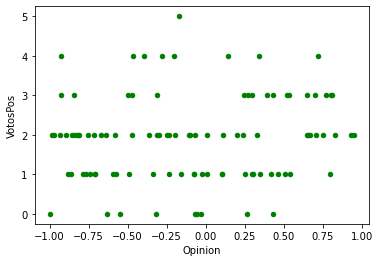

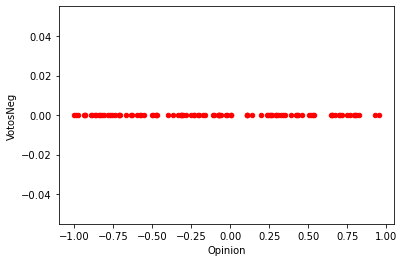

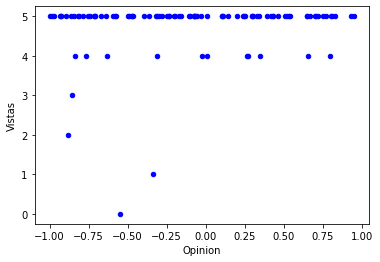

-------------------------------------------------------------------------------------
Muestra N: 200
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


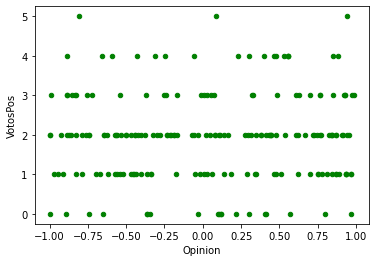

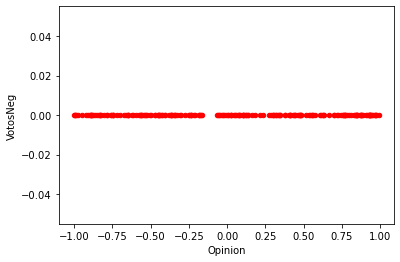

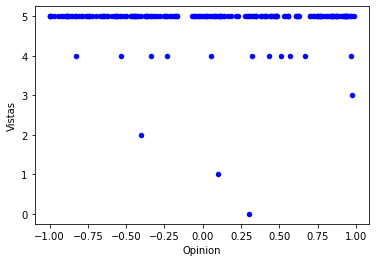

-------------------------------------------------------------------------------------
Muestra N: 500
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


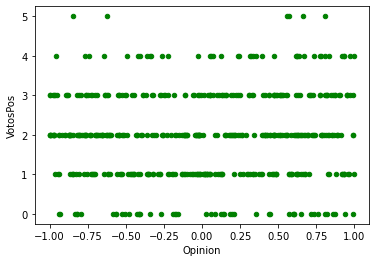

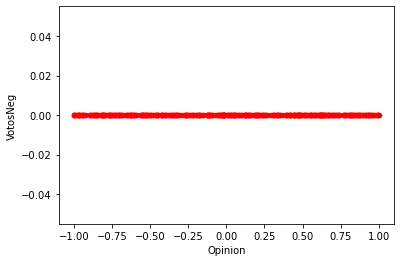

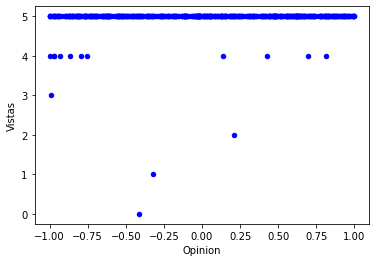

-------------------------------------------------------------------------------------
Muestra N: 1000
Opiniones XXXX, con una distribucion XXXX [-1,1]
Algoritmo XXXX, del conjunto de XXXX


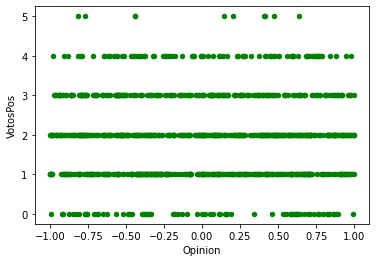

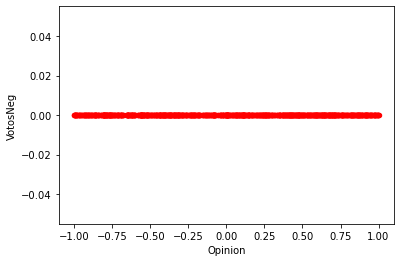

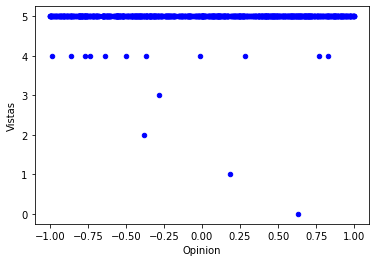

In [34]:
#¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Creo la muestra ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

for q in TamañoDeLaMuestra:
    Muestra_Completa = {}
    for k in range (1,q):
        Muestra_Completa [k] = AgenteNulo ("uniforme",k*111)


    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Variables que hay que definir ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    VotosPos = 2
    VotosNeg = 0
    
    #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤ Simulacion ¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤#

    Muestra_Simulacion = Muestra_Completa.copy() # Creo una copia de la muestra original, por si se crean varias simulaciones diferentes
    DataSave = pd.DataFrame(columns=['ID', 'Opinion', 'VotosPos', 'VotosNeg', 'Vistas', 'Ratio'])
    MinutoAMinuto = pd.DataFrame(columns=['Sujeto', 'Opinion Sujeto', 'ID Idea Mostrada', 'Idea Mostrada', 'Otras opiniones que vio', 'Voto', 'Distancia'])
    OpinanNoVotan = 0
    TiempoSimulacion = 0
    QIdeasAVotar = VotosPos + VotosNeg

    for i in Muestra_Simulacion:
        ParticipanteActual = i
        
        if OpinanNoVotan < QOpinionesExpuestas: # Si hay menos opiniones que las necesarias para mostrar los individuos van a opinar, no votar.
            DataSave.at [OpinanNoVotan] = Muestra_Simulacion.get(i).get_ID(), Muestra_Simulacion.get(i).get_Oi(), 0, 0, 0, 0
            OpinanNoVotan +=1
        
        else:
            OpinionesFiltradas = DataSave[DataSave.Vistas < QVecesMuestroOpinion] # Filtro las ideas que tengan menos vistas del limite asignado
            OpinionesParaVotar =  metodo_de_seleccion (OpinionesFiltradas, "menos vistas") # Creo un dataframe con las ideas que va a ver el sujeto
            DataSave.at [i] = Muestra_Simulacion.get(i).get_ID(), Muestra_Simulacion.get(i).get_Oi(), 0, 0, 0, 0
            VotoActual = Muestra_Simulacion.get(i).votar(OpinionesParaVotar)
            
            for i in VotoActual.index:
                
                if VotoActual.loc[i].at[0] == 1:
                    DataSave.at [i,'VotosPos'] = DataSave.at [i,'VotosPos'] + 1 # Le sumo un voto a la idea.
                
                if VotoActual.loc[i].at[0] == -1:
                    DataSave.at [i,'VotosNeg'] = DataSave.at [i,'VotosNeg'] + 1 # Le sumo un voto a la idea. 
            
            for i in OpinionesParaVotar.index:
                OpinionI = i
                DataSave.at [i,'Vistas'] = DataSave.at [i,'Vistas'] + 1 # Le sumo una vista a la ideas expuestas
                
                ################################################################ DEBERIA CONFIGURAR ALGO PARA VER COMO AFECTAN LOS VOTOS NEGATIVOS EN EL RATIO?
                DataSave.at [i, 'Ratio'] = DataSave.at[i, 'VotosPos'] / DataSave.at [i, 'Vistas']
                
                # Armo un dataframe con el minuto a minuto de lo que fue pasando en la simulacion
                CopiaOpiniones = OpinionesParaVotar.index.tolist()
                CopiaOpiniones.remove(i)
                MinutoAMinuto.at [TiempoSimulacion] = Muestra_Simulacion.get(ParticipanteActual).get_ID(), Muestra_Simulacion.get(ParticipanteActual).get_Oi(), i, OpinionesParaVotar.at [i,'Opinion'], CopiaOpiniones, 0, Muestra_Simulacion.get(ParticipanteActual).comparar(OpinionesParaVotar.at [i,'Opinion']) 
                if i in VotoActual.index:
                    for i in VotoActual.index:
                        if i == OpinionI:
                            MinutoAMinuto.at [TiempoSimulacion,'Voto'] = VotoActual.at [i,0]  
                TiempoSimulacion +=1

    ##### Visualizo la data
    print ("-------------------------------------------------------------------------------------")
    print ("Muestra N: " + str(q))
    print ("Opiniones XXXX, con una distribucion XXXX [-1,1]")
    print ("Algoritmo XXXX, del conjunto de XXXX")
    #print (DataSave.sort_values(by=['Votos'], ascending=False))
    DataSave.plot(kind='scatter',x='Opinion',y='VotosPos',color='green')
    DataSave.plot(kind='scatter',x='Opinion',y='VotosNeg',color='red')
    DataSave.plot(kind='scatter',x='Opinion',y='Vistas',color='blue')
    #plt.yticks(range(5))
    plt.show()

